In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin
/kaggle/input/my-stopwords/my_stopwords.xlsx
/kaggle/input/spell-bigtext/big.txt
/kaggle/input/topic-model/LDA_dataset.csv
/kaggle/input/abbreviation/abbreviations_data.csv
/kaggle/input/open-end-data/Open Ended_Data.xlsx


Flow of my Work

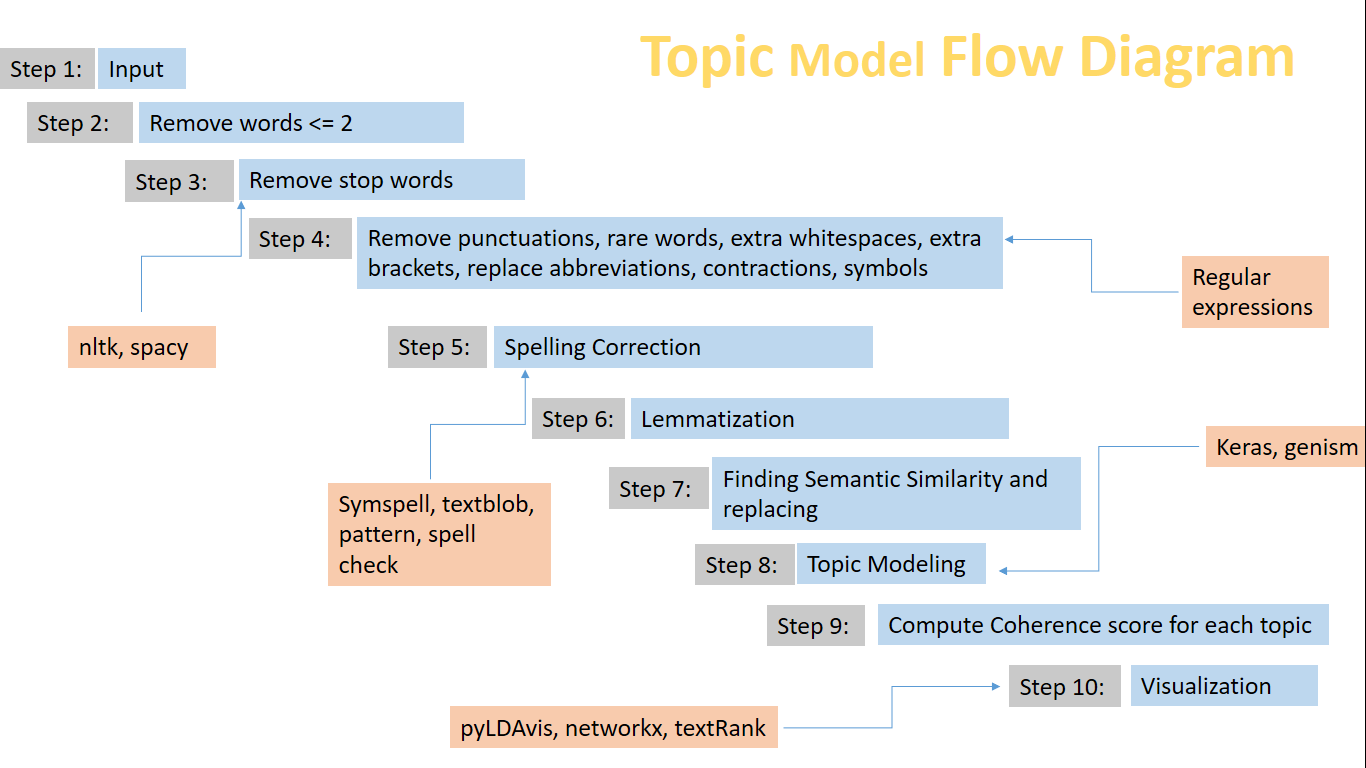

Always we keep the data in Dataframe type as it is easier for access. So all the datasets are read as Dataframe. Depending on the need we change the type accordingly for better codiing purpose.

In [2]:
# Reading the Actual text data in the form of Data Frame  
New_df = pd.read_excel("../input/open-end-data/Open Ended_Data.xlsx")
# Abbreviations data created manually for better cleaning
abb_df = pd.read_csv("../input/abbreviation/abbreviations_data.csv")
# Similarly stop words data created manually
stop_df = pd.read_excel("../input/my-stopwords/my_stopwords.xlsx") 

Stop words are used for data cleaning purpose right. So, for cheking purpose list is better than dataframe.

In [3]:
# Converting Stopwords of type Dataframe into list type
S = stop_df['stopwords'].to_list()
# set is used for extracting the unqiue words (since it is created manually)
StopWords = list(set(S))

Instead of using the in-built libraries for data cleaning, if we use our own data for cleaning it would be far better right and in my case also it worked better as expected. Hence, I created my own data for data cleaning.

In [4]:
# Data created for Replacing the contractions
contractions_dict = {
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",

    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",

    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",

    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not"
}

In [5]:
# Creating symbols dictionary
symbol_dict = {
    "$":" dollar",
    "%":" percent",
    "#":" hashtag",
    "&":" and",
    "@":" at",
    "w/o":" without",
    "w/":" with"
}

In [6]:
# Similar to the conversion of stopwords, we convert abbreviations data of type Dataframe into a dictionary to reduce
# the lines of code
abbr_dict = abb_df.set_index('abbreviation').to_dict('dict')

Spelling Correction: Building a model for spelling correction with huge text data(big,txt), training it with almost all possible combinations of a word by reversing, transposing, deleting letters in between, replacing random letters. Doing this way gave me awesome results when compared to inbuilt functions.

In [7]:
from collections import Counter
import re
def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('../input/spell-bigtext/big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

The dataframe I use throughout the coding takes only two columns into account namely, "id" and "text data" as at a time we consider only one whole text column.

In [8]:
# Selecting only the id and first text column from my actual data
df = New_df.iloc[:,0:2]

Column names may be lenghty so renaming the column names according to our convenience is better right.

In [9]:
df.columns = ['id', 'content']

Data Preprocessing

Till now we were just doing the pre works, making the data ready to use. We have all the data, so just apply it to the actual data 

In [10]:
def DataCleaning(df, StopWords, contractions_dict, abbr_dict, symbol_dict):
    # converting strings to lowercase
    df.content.replace(to_replace='[^a-zA-Z]', value = " ", inplace=True, regex=True) 
    
    # removing words having len <=2
    df.content.replace(to_replace=r'\b\w{1,3}\b', value = "", inplace=True, regex=True) 
    
    # Remove punctuations
    df['content'] = df['content'].str.replace('[^\w\s]','')
    
    # Removing Stopwords
    df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in StopWords))
    
    # Replacing contractions 
    df.content.replace(contractions_dict, regex=True,inplace=True)
    
    # Replacing Abbreviations
    df.content.replace(abbr_dict,regex=True,inplace=True)
    
    # Replacing symbols
    df.content.replace(symbol_dict,regex=True,inplace=True)
    
    return df

In [11]:
df = DataCleaning(df, StopWords, contractions_dict, abbr_dict, symbol_dict)

Still our data is not cleaned much. We lemmatize each word and then do spelling corrections

In [12]:
# These are in-built libraries for doing the lemmatization since manual work is tedious for lemmatizing
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [13]:
# Using the correction function which is being trained by my model 
# Doing spelling correction and lemmatization only for adjectives, verbs and adverbs, not for nouns
# I make the correction first and then I lemmatize
# it takes some time to run 
def NextLevelCleaning(df):
    for i in range(df.shape[0]):
        words_notin_stopwords = []
        # Tagging each word with their grammar meaning
        doc = nlp(df.iloc[i,1])
        for token in doc:
            if token.pos_ == 'ADJ':
                x = correction(str(token))
                words_notin_stopwords.append(lemmatizer.lemmatize(x, pos='a'))
            if token.pos_ == 'VERB':
                x = correction(str(token))
                words_notin_stopwords.append(lemmatizer.lemmatize(x, pos='v'))
            if token.pos_ == 'ADV':
                x = correction(str(token))
                words_notin_stopwords.append(lemmatizer.lemmatize(x, pos='r'))
        df.iloc[i,1] = ' '.join(words_notin_stopwords)
    return df

In [14]:
df = NextLevelCleaning(df)

Almost we cleaned the text to perfection. If we still make the text even better by finding the words that are related and replace with a single word looks better.

semantic similarity: I have build a model for finding semantic similarity based on my data. 

In order to train my model, my data should be of type list of list of words eg., data = [['this', 'is', 'first', 'sentence'], ['this', 'is', 'second']] So, converted my data in this form called final_data

In [15]:
import nltk 
from nltk.corpus import wordnet 

In [16]:
# Finding Semantic Similarity for words that are not nouns
def Find_And_Replace_Related_Words(df):
    similar_words = {}
    for i in range(df.shape[0]):
        words = df.iloc[i,1].split()
        for key in words:
            syn_names = []
            for syn in wordnet.synsets(key):
                if syn.name().split(".")[0] not in syn_names:
                    syn_names.append(syn.name().split(".")[0])
            if key in syn_names:
                syn_names.remove(key)
            key = key + " "
            similar_words[key] = tuple(syn_names)
    # Converting dict into a dataframe
    synonyms_df = pd.DataFrame(list(similar_words.items()), columns=['key', 'synonyms'])
    new_dict = dict(zip(similar_words.values(),similar_words.keys()))
    
    # New_dict: {'paper','school','college','exams'} : "education"
    # Convert into: {'paper'} : 'education'
    #               {'school'} : 'education'
    #               {'college'} : 'education'
    #               {'exams'} : 'education'
    final_df = pd.DataFrame(columns = ['Find','Replace'] )
    for key in new_dict.keys():
        d = pd.DataFrame({"Find":["he"],"Replace":["she"]})
        if key:
            for j in key:
                d.iloc[0,0] = j
                d.iloc[0,1] = new_dict[key]
                find = final_df.Find.to_list()
                if d.iloc[0,0] not in find:
                    final_df = final_df.append(d)
                    
    # Finding and Replacing in my actual data
    for i in range(df.shape[0]):
        words = df.iloc[i,1].split()
        clean_words = []
        for word in words:
            for j in range(final_df.shape[0]):
                if word == final_df.iloc[j,0]:
                    clean_words.append(final_df.iloc[j,1])
                    break
                else:
                    clean_words.append(word)
                    break
        df.iloc[i,1] = " ".join(list(set(clean_words)))
        
    return df

In [17]:
df = Find_And_Replace_Related_Words(df)

In [18]:
# Cleaned data
df.head()

,id,content
0,1,achieve care difficult reach active long stay ...
1,2,decide stay handle leave increase sundays
2,3,help there leave relate complete speak
3,4,direct suppurative intimate demotivated direct...
4,5,decide think pursue long leave hence relate hi...


We came to the end part of data cleaning. The data is perfect for use. Next step is model building.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

fit_transform(): we always make the data centered or normalised, so the fit function actually stores the parameters of each X = (x - mu) / sigma value for training data. We have to apply the same paramters for testing also, so fit stores it internally as an object and uses that for testing also using transform. The name fit_transform is just fitting for training and use the same transformation of normalising tha data using transform.

In [20]:
TfidfVector = TfidfVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True)
Tfidf_data_vector = TfidfVector.fit_transform(df['content'])

LatentDrichletAllocation parameters: n_components: no_of_topics max_iter: no_of_iterations learning_method: online will be fater when we deal with large data if learning_method is online only learning_offset, learning_decay and all will be enabled learning_decay: learning rate learning_offset: it diminishes or down-weights the early iterations. Online learning is for large dataset right, so the learning will be done for long-time, so just to refresh the learning it is used.

after seeing the outputs of both gensim.LDA and sklearn.LDA, I felt like sklearn works better. So, proceeded with that alone(finding the score of my model, fixing the parameters).

GridSearchCV: Grid Search Cross-Validation It is used when we dont know the model parameters. It helps in fiinding the best model parameters.

Hype-paramters: Defined from heuristics

parameters: Defined from experiments

So, you just have to mention the hyper-parameters for the parameters that you want for your model. It itself tells the best values.

In [21]:
from sklearn.model_selection import GridSearchCV

tunining parameters for LDA model is the no of topics and then the learning rate

just if we give the list of no of topics and the learning rate, the in-inbuilt has all the functions to say which is the best

In [22]:
params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

LDA = LatentDirichletAllocation()

Tfidfmodel = GridSearchCV(LDA, param_grid = params)

Tfidfmodel.fit(Tfidf_data_vector)

print("Tfidf model: ")
Tfidfbest = Tfidfmodel.best_estimator_ # Fitting the best model
print(Tfidfmodel.best_estimator_)

print("TfidfBest parameters:")
print(Tfidfmodel.best_params_)

print("TfidfBest Likelihood score:")
print(Tfidfmodel.best_score_)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Tfidf model: 
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)
TfidfBest parameters:
{'learning_decay': 0.7, 'n_components': 10}
TfidfBest Likelihood score:
-33822.675928454126


In [23]:
# getting the model parameters
Learning_decay = Tfidfmodel.best_params_['learning_decay']
no_of_topics = Tfidfmodel.best_params_['n_components']

In [24]:
def selected_topics(model, vectorizer, top_n=10):
    Topics = []
    for idx, topic in enumerate(model.components_):
        x = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        Topics.append(x)
        print(idx)
        print(x)
    return Topics

In [25]:
Tfidfbest_LDA_model = LatentDirichletAllocation(n_components=no_of_topics, max_iter=5, learning_method='online', learning_decay=Learning_decay,random_state=0).fit(Tfidf_data_vector)
Tfidfbest_LDA_transform = Tfidfbest_LDA_model.fit_transform(Tfidf_data_vector)
Tfidf_final_Topics = selected_topics(Tfidfbest_LDA_model, TfidfVector)
print("Tfidf log-likelihood",Tfidfbest_LDA_model.score(Tfidf_data_vector))

0
[('earn', 9.122810684400363), ('adjust', 8.549153440022979), ('cope', 8.005433888320841), ('strong', 5.867127876468841), ('tough', 5.860293098598273), ('laws', 5.728499841480168), ('process', 5.528049560880735), ('place', 5.504500205953466), ('wished', 4.688106573964963), ('purely', 4.488696455675543)]
1
[('effectively', 13.135689930744233), ('mental', 6.374957398055487), ('level', 4.811272344798461), ('figure', 2.7182348477534894), ('challenging', 2.2752392485947985), ('excited', 2.225185802872243), ('query', 1.8913578763092593), ('communicate', 1.5703916091476726), ('head', 0.9864567788885376), ('maintain', 0.14580940863489059)]
2
[('undergo', 11.767571091071094), ('drop', 9.72472967335664), ('presently', 9.454215694074133), ('suggest', 8.192254254490765), ('operate', 7.4685098524199605), ('advise', 7.280788379232025), ('diagnose', 7.076817873852959), ('reside', 6.304926335704214), ('scold', 5.872277272191849), ('feasible', 5.802581098653149)]
3
[('manner', 12.61649457158093), ('de

In [26]:
Tfidfbest_LDA_model.perplexity(Tfidf_data_vector)

1399.6769969786897

After fitting the model, we find the pair of words with the frequency for visualizations.

In [27]:
def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer(ngram_range=(2, 2),stop_words = "english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df.iloc[:,1], 10)

In [28]:
common_words

[('speak work', 65.11436569138519),
 ('decide currently', 60.1335388781789),
 ('join leave', 56.16103623810432),
 ('want work', 50.947815791412204),
 ('stay leave', 44.92047974220019),
 ('work ask', 44.721771353525114),
 ('leave tell', 39.04038580441807),
 ('start tell', 36.608733451107874),
 ('tell work', 32.34827719339127),
 ('leave wait', 29.07520800136525)]

In [29]:
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

pyLDAvis is used to visually see each topic's distribution. It plots each topic into a shape of bubble with it's corresponding distribution of words.

A good model will have non-overlapping bubbles with fairly large size.

In [30]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(Tfidfbest_LDA_model, Tfidf_data_vector, TfidfVector, mds='tsne')
panel

/opt/conda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
9     -393.779999 -133.401474       1        1  59.324844
6      131.674316  239.925903       2        1  12.533678
5     -123.776489  366.535004       3        1   7.713287
2      107.096718 -404.139374       4        1   4.114924
0      377.531616   95.557945       5        1   3.383272
8      363.802490 -220.119553       6        1   2.938558
7     -147.398468 -276.274017       7        1   2.709650
3     -380.401184  182.173203       8        1   2.497846
1      106.824738  -80.483612       9        1   2.407158
4     -122.828522   43.644901      10        1   2.376783, topic_info=    Category        Freq         Term       Total  loglift  logprob
237  Default   31.000000  effectively   31.000000  30.0000  30.0000
449  Default  198.000000        leave  198.000000  29.0000  29.0000
529  Default  103.000000        offer  103.000000  28.0000  28.0000
483  Default   27.000000       manner   27.000000  27.0000  27.0000
872  Default  204.000000         work  204.000000  26.0000  26.0000
..       ...         ...          ...         ...      ...      ...
695  Topic10    0.242317      satisfy   15.819699  -0.4393  -7.0483
436  Topic10    0.242196         know   62.778560  -1.8182  -7.0488
135  Topic10    0.241804      compare   18.286736  -0.5864  -7.0505
872  Topic10    0.241632         work  204.005055  -2.9991  -7.0512
66   Topic10    0.241544       attend   12.881231  -0.2371  -7.0515

[532 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         3  0.550682  abroad
0         5  0.330409  abroad
2         2  0.355651  absurd
3         6  0.897765   abuse
5         1  0.655353  accept
...     ...       ...     ...
878       1  0.897693  wouldn
880       1  0.781457   wrong
880       2  0.086829   wrong
882       1  0.575484   young
882      10  0.230194   young

[597 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 6, 3, 1, 9, 8, 4, 2, 5])

Now we classify each record into topics generated by our model.

In [31]:
final_data = []
for i in range(df.shape[0]):
    final_data.append(df.iloc[i,1].split())

In [32]:
len(final_data)

3306

In [33]:
# Giving names to the Topics
topic_names = ["Topic" + str(i) for i in range(Tfidfbest_LDA_model.n_components)]

# Giving names to each row
doc_names = ["Doc" + str(i) for i in range(len(final_data))]

df_document_topic = pd.DataFrame(np.round(Tfidfbest_LDA_transform, 2), columns=topic_names, index=doc_names)

# It's just finding the word that has maximum prob. value row-wise
# after fitting and transforming, we get the normalised value for each words in the document. From that, finding the max value 
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df['y_class'] = (df_document_topic['dominant_topic']).to_list()

In [34]:
df_document_topic.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.02,0.02,0.39,0.02,0.02,0.02,0.02,0.02,0.02,0.44,9
Doc1,0.03,0.03,0.03,0.27,0.03,0.47,0.03,0.03,0.03,0.03,5
Doc2,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.70,9
Doc3,0.02,0.02,0.02,0.02,0.02,0.02,0.28,0.02,0.02,0.53,9
Doc4,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.16,0.03,0.64,9


In [35]:
df.head()

,id,content,y_class
0,1,achieve care difficult reach active long stay ...,9
1,2,decide stay handle leave increase sundays,5
2,3,help there leave relate complete speak,9
3,4,direct suppurative intimate demotivated direct...,9
4,5,decide think pursue long leave hence relate hi...,9


In [36]:
# We plot the words of the dominant topic based on frequency 
Count_of_each_topic = [1]
dominant_topic = 0
df_class = df['y_class'].to_list()
for topic in range(no_of_topics):
    if max(Count_of_each_topic) < df_class.count(topic):
        Count_of_each_topic.append(df_class.count(topic))
        dominant_topic = topic
        
print("dominant_topic:", dominant_topic)

dominant_topic: 9


In [37]:
class_list = [dominant_topic]

# getting the dominant class datapoints alone
dominant_class = df.loc[df.y_class.isin(class_list),:]

In [38]:
import nltk
from nltk.probability import FreqDist

class_words = []
for i in range(dominant_class.shape[0]):
    words = dominant_class.iloc[i,1].split()
    for w in words:
        class_words.append(w)

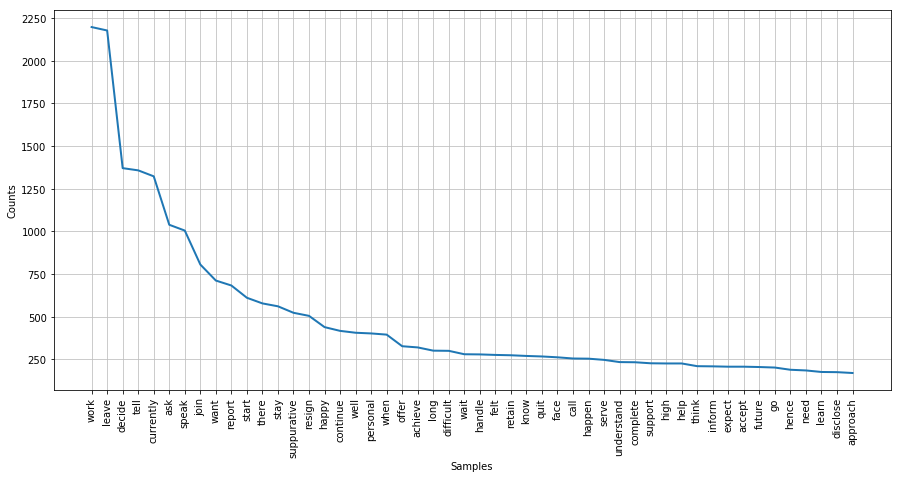

In [39]:
freq = nltk.FreqDist(class_words)
plt.figure(figsize=(15,7))
freq.most_common(50)
freq.plot(50)